In [131]:

import csv
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [2]:
pd.set_option('display.max_columns', 500)

In [121]:
df = pd.read_csv('Capstone updated 1227.csv')

In [48]:
X = df.drop(columns = ['is_churn','msno'])
y = df['is_churn']
X

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,avg_membership_duration,avg_time_between_transactions,num_unq,total_secs,percent_25,percent_50,percent_100,city,registered_via,latest_transaction_year,latest_transaction_month,latest_transaction_week,latest_transaction_day,latest_membership_expiration_year,latest_membership_expiration_month,latest_membership_expiration_week,latest_membership_expiration_day,latest_listen_date_year,latest_listen_date_month,latest_listen_date_week,latest_listen_date_day,registration_init_time_year,registration_init_time_month,registration_init_time_week,registration_init_time_day
0,39.0,30.0,149.0,149.0,1.0,0.0,49.5,15.5,43.0,115411.260,0.075838,0.021164,0.876543,15.0,9.0,2017,3,13,31,2017,5,20,19,2017,3,13,31,2010,11,46,18
1,39.0,30.0,149.0,149.0,1.0,0.0,53.5,15.5,52.0,36636.638,0.317597,0.077253,0.562232,22.0,9.0,2017,3,13,31,2017,5,21,23,2017,3,13,30,2012,1,3,22
2,14.0,30.0,149.0,149.0,1.0,0.0,34.5,15.5,25.0,10243.065,0.090909,0.072727,0.763636,13.0,3.0,2017,3,13,31,2017,5,18,4,2017,3,12,25,2014,4,17,21
3,39.0,30.0,149.0,149.0,1.0,0.0,51.5,15.5,80.0,292650.977,0.157303,0.024345,0.808989,13.0,9.0,2017,3,13,31,2017,5,20,21,2017,3,13,28,2006,2,7,18
4,39.0,30.0,149.0,149.0,1.0,0.0,43.5,15.5,7.0,2994.947,0.000000,0.142857,0.857143,22.0,9.0,2017,3,13,31,2017,5,19,13,2017,3,12,25,2010,9,38,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725717,41.0,30.0,99.0,99.0,1.0,0.0,30.0,0.0,38.0,27727.142,0.057554,0.007194,0.913669,6.0,9.0,2017,3,13,31,2017,4,17,30,2017,3,12,24,2014,10,42,14
725718,41.0,30.0,99.0,99.0,1.0,0.0,32.0,0.0,45.0,51394.898,0.095238,0.035714,0.861111,1.0,7.0,2017,3,11,18,2017,4,16,19,2017,3,12,26,2011,8,34,23
725719,41.0,30.0,99.0,99.0,1.0,0.0,31.0,0.0,40.0,13172.171,0.033333,0.000000,0.966667,4.0,7.0,2017,3,12,26,2017,4,17,26,2017,3,10,10,2012,3,10,6
725720,36.0,30.0,180.0,180.0,0.0,0.0,32.0,0.0,56.0,268039.763,0.094642,0.048017,0.825331,5.0,3.0,2017,2,9,28,2017,4,13,1,2017,3,13,31,2015,4,18,30


In [47]:
# split data. Using Scaler here, but I've included Scaler as a parameter in the later GridSearchCVs.

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y)
scaler = StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

array([[ 0.61389786, -0.13500767, -0.34835181, ...,  0.94795432,
         0.9564769 ,  0.13627626],
       [ 0.61389786, -0.13500767, -0.03640526, ...,  1.22299494,
         1.33359981,  1.63179048],
       [-1.17029244, -0.13500767, -0.03640526, ...,  0.6729137 ,
         0.57935399, -1.47427753],
       ...,
       [ 0.61389786, -0.13500767, -0.34835181, ...,  1.49803557,
         1.58501508,  0.94155315],
       [-0.66052378, -0.13500767,  0.1570016 , ..., -1.52741128,
        -1.43196818,  1.0565927 ],
       [ 0.61389786, -0.13500767, -0.34211288, ..., -1.25237066,
        -1.18055291,  0.82651359]])

In [179]:
#1 Random forest model performance

# scaled X first, then non-scaled X.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, random_state = 42,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)



In [16]:
f1 = f1_score(y_pred, y_test,average = 'weighted')
roc = roc_auc_score(y_pred,y_test)
ac = accuracy_score(y_test, y_pred)
print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print('Random Forest: roc=%.3f' % (roc))

scores = pd.DataFrame(columns = ['Model','Accuracy', 'F1', 'ROC'])

df1 = {'Model': 'Random Forest',
       'Accuracy': [ac],
       'F1' : [f1],
       'ROC': [roc]}

df1 = pd.DataFrame(df1)
scores = pd.concat([scores, df1])
scores

Random Forest: Accuracy=0.987
Random Forest: f1-score=0.987
Random Forest: roc=0.955


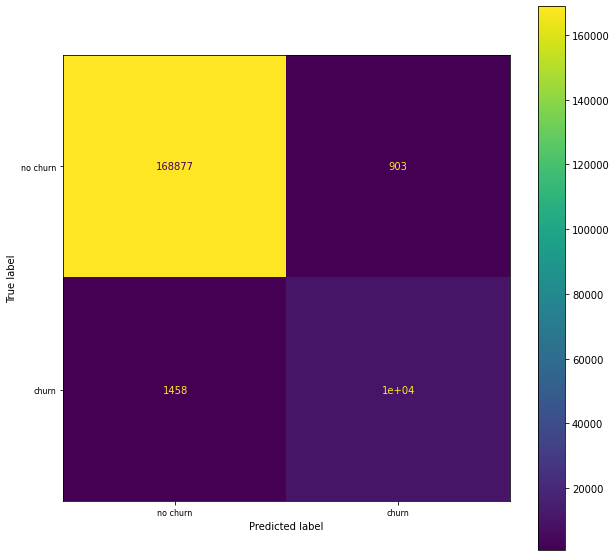

In [180]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
fig, ax = plt.subplots(figsize = (10,10))
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no churn', 'churn'],
                                   )
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no churn', 'churn'], fontsize = 8)
ax.set_yticklabels(labels = ['no churn', 'churn'], fontsize = 8)
display_cm.plot(ax = ax)

In [181]:
cm

array([[168877,    903],
       [  1458,  10193]], dtype=int64)

30


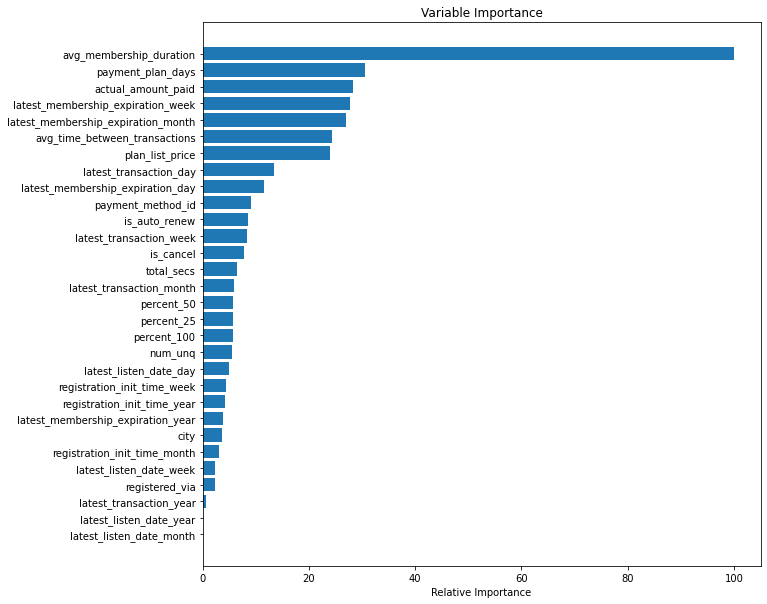

In [51]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [178]:
from sklearn.pipeline import Pipeline
n_est = [int(n) for n in np.arange(start=0, stop=101, step=25)]
max_depth = [int(x) for x in np.linspace(25, 500, num = 20)]

pipeline = Pipeline([('rfc', RandomForestClassifier(random_state= 42))])
grid_params = {
    'rfc__n_estimators': n_est,
    'rfc__max_depth': max_depth,
}

n_est = [int(n) for n in np.arange(start=0, stop=101, step=25)]
max_depth = [int(x) for x in np.linspace(25, 500, num = 20)]
grid_cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid = {'max_depth': max_depth,
                                                                              'n_estimators':n_est}, 
                                                                               cv =5, n_jobs = -1, scoring = 'f1')

In [29]:
grid_cv.fit(X_train_scaled,y_train)
grid_cv.best_params_

C:\Users\marsh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.89478092 0.89478236 0.89555984 0.89585015        nan
 0.89440135 0.8944802  0.89663426 0.8968172         nan 0.89391109
 0.89465469 0.89656504 0.89670758        nan 0.89391109 0.89465469
 0.89656504 0.89670758        nan 0.89391109 0.89465469 0.89656504
 0.89670758        nan 0.89391109 0.89465469 0.89656504 0.89670758
        nan 0.89391109 0.89465469 0.89656504 0.89670758        nan
 0.89391109 0.89465469 0.89656504 0.89670758        nan 0.89391109
 0.89465469 0.89656504 0.89670758        nan 0.89391109 0.89465469
 0.89656504 0.89670758        nan 0.89391109 0.89465469 0.89656504
 0.89670758        nan 0.89391109 0.89465469 0.89656504 0.89670758
        nan 0.89391109 0.89465469 0.89656504 0.89670758        nan
 0.89391109 0.89465469 0.89656504 0.89670758        nan 0.89391109
 0.89465469 0.89656504 0.89670758        nan 0.893911

{'max_depth': 50, 'n_estimators': 100}

In [192]:
# with above hyperparameters

clf = RandomForestClassifier( n_estimators=100, random_state = 42, max_depth = 50, max_features = 'auto',
                             n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))



Random Forest: Accuracy=0.987
Random Forest: f1-score=0.987


In [197]:
f1 = f1_score(y_test, y_pred)
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: f1-score=0.895


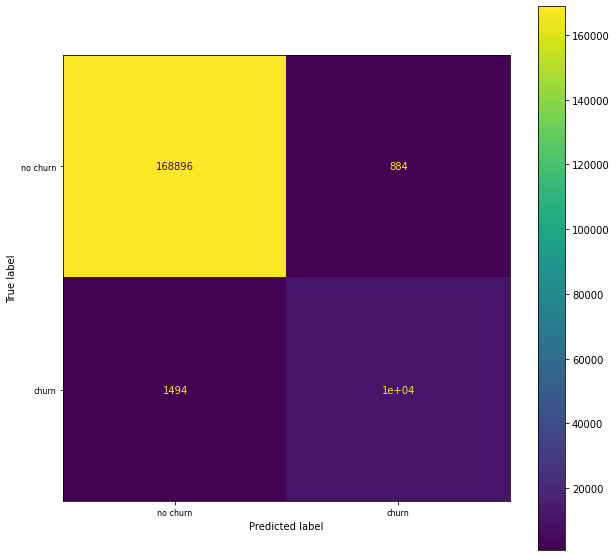

In [189]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
fig, ax = plt.subplots(figsize = (10,10))
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no churn', 'churn'],
                                   )
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no churn', 'churn'], fontsize = 8)
ax.set_yticklabels(labels = ['no churn', 'churn'], fontsize = 8)
display_cm.plot(ax = ax)

In [190]:
cm

array([[168896,    884],
       [  1494,  10157]], dtype=int64)

In [129]:
rfcv = cross_val_score(RandomForestClassifier(n_estimators=100, random_state = 42, max_depth = 50, max_features = 'auto',
                             n_jobs=-1),
                      X_train_scaled, y_train, cv = StratifiedKFold(), scoring = 'f1')

print(f'Scores for each fold are: {rfcv}')
print(f'Average score: {"{:.3f}".format(rfcv.mean())}')

Scores for each fold are: [0.89945851 0.89940129 0.89234397 0.89508221 0.89780001]
Average score: 0.897


In [117]:
# pipeline to see if non scaled X is better.

RF_pipe = make_pipeline(
StandardScaler(),
RandomForestClassifier( n_estimators=100, random_state = 42, max_depth = 50, max_features = 'auto',
                             n_jobs=-1))


grid_params = {'standardscaler': [StandardScaler(),None]}

rf_grid_cv = GridSearchCV(RF_pipe, param_grid = grid_params, cv = 5, n_jobs = -1)
model = rf_grid_cv.fit(X_train,y_train)
model.best_params_

{'standardscaler': None}

In [118]:
# model using non scaled X

clf = RandomForestClassifier( n_estimators=100, random_state = 42, max_depth = 50, max_features = 'auto',
                             n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

roc = roc_auc_score(y_test,y_pred)

print('Random Forest: roc-score=%.3f' % (roc))


Random Forest: Accuracy=0.987
Random Forest: f1-score=0.987
Random Forest: roc-score=0.934


In [130]:
rfcv = cross_val_score(RandomForestClassifier(n_estimators=100, random_state = 42, max_depth = 50, max_features = 'auto',
                             n_jobs=-1),
                      X_train, y_train, cv = StratifiedKFold(), scoring = 'f1')

print(f'Scores for each fold are: {rfcv}')
print(f'Average score: {"{:.3f}".format(rfcv.mean())}')

Scores for each fold are: [0.89992685 0.89987438 0.89207892 0.89410029 0.89794118]
Average score: 0.897


In [170]:
model = RandomForestClassifier( n_estimators=100, random_state = 42, max_depth = 50, max_features = 'auto',
                             n_jobs=-1)
model = model.fit(X_train,y_train)

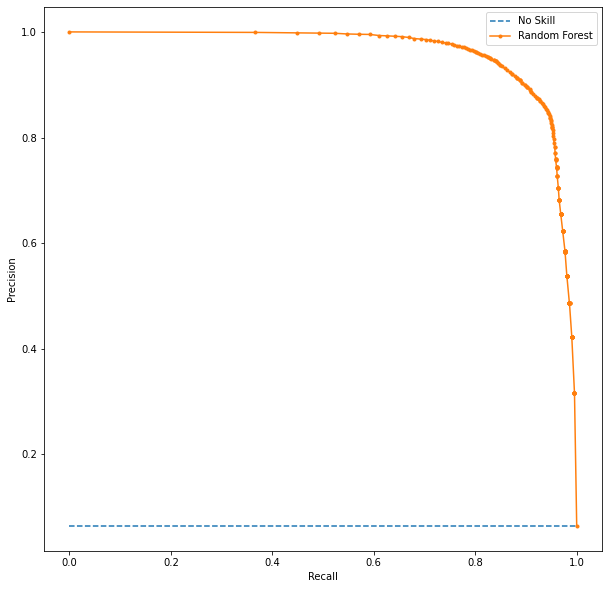

In [171]:
# PR curve for nonscaled
model = RandomForestClassifier( n_estimators=100, random_state = 42, max_depth = 50, max_features = 'auto',
                             n_jobs=-1)
model = model.fit(X_train,y_train)
plt.figure(figsize=(10,10))
rf_probs = model.predict_proba(X_test)
rf_probs = rf_probs[:,1]
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

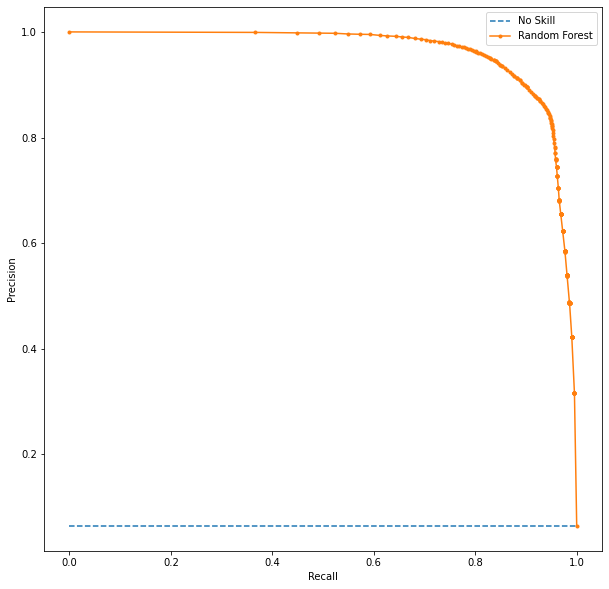

In [172]:
#trying Scaled data just in case. 
model = RandomForestClassifier( n_estimators=100, random_state = 42, max_depth = 50, max_features = 'auto',
                             n_jobs=-1)
model = model.fit(X_train_scaled,y_train)
plt.figure(figsize=(10,10))
rf_probs = model.predict_proba(X_test_scaled)
rf_probs = rf_probs[:,1]
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [52]:
#2 Logistic Regression model performance

# scaled X first, then non-scaled X.

lr = LogisticRegression(solver = 'liblinear', max_iter = 500)

In [53]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [56]:
y_pred_test = lr.predict(X_test_scaled)
y_pred_train = lr.predict(X_train_scaled)
print('Accuracy score test =' + f'{accuracy_score(y_pred_test,y_test):.2f}')

print('roc auc score test =' + f'{roc_auc_score(y_pred_test,y_test):.2f}')

print('f1 score test =' + f'{f1_score(y_pred_test,y_test):.2f}')

ac = accuracy_score(y_pred_test,y_test)
roc = roc_auc_score(y_pred_test,y_test)
f1 = f1_score(y_pred_test,y_test)

Accuracy score test =0.96
roc auc score test =0.91
f1 score test =0.65


In [57]:
df2 = {'Model': 'Logistic Regression',
       'Accuracy': [ac],
       'F1' : [f1],
       'ROC': [roc]}

df2 = pd.DataFrame(df2)
scores = pd.concat([scores, df2])
scores

,Model,Accuracy,F1,ROC
0,Random Forest,0.986893,0.986729,0.933282
0,Logistic Regression,0.963782,0.654503,0.906778


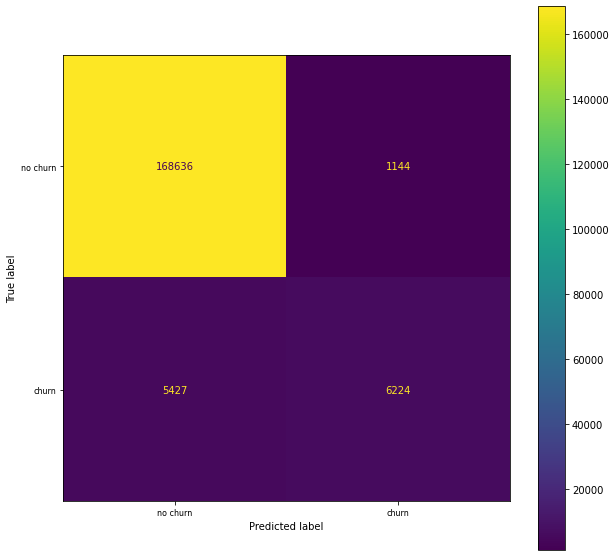

In [58]:
cm = confusion_matrix(y_test, y_pred_test, labels = lr.classes_)
fig, ax = plt.subplots(figsize = (10,10))
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no churn', 'churn'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no churn', 'churn'], fontsize = 8)
ax.set_yticklabels(labels = ['no churn', 'churn'], fontsize = 8)
display_cm.plot(ax = ax)

In [59]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    509339
           1       0.85      0.54      0.66     34952

    accuracy                           0.96    544291
   macro avg       0.91      0.77      0.82    544291
weighted avg       0.96      0.96      0.96    544291



In [60]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    169780
           1       0.84      0.53      0.65     11651

    accuracy                           0.96    181431
   macro avg       0.91      0.76      0.82    181431
weighted avg       0.96      0.96      0.96    181431



In [247]:
gs = GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter = 500), {'C': [0.001, 0.1, 1, 10, 100]}, cv = 5)
trainmodel = gs.fit(X_train_scaled,y_train)
print(trainmodel.best_params_)

testmodel = gs.fit(X_test_scaled, y_test)
print(testmodel.best_params_)
y_predict_training = trainmodel.predict(X_train_scaled)
y_predict_test = testmodel.predict(X_test_scaled)
tr_accuracy = f1_score(y_predict_training, y_train)
tst_accuracy = f1_score(y_predict_test, y_test)
print('training score is ' + str(tr_accuracy))
print('test score is ' + str(tst_accuracy))

{'C': 100}
{'C': 100}
training score is 0.65942003576563
test score is 0.6550507974943413


In [ ]:
lr = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 100)
lr = lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)


In [102]:
lrcv = cross_val_score(LogisticRegression(random_state = 42, solver ='liblinear', max_iter = 500, C = 100),
                      X_train_scaled, y_train, cv = StratifiedKFold(), scoring = 'f1')

In [104]:
print(f'Scores for each fold are: {lrcv}')
print(f'Average score: {"{:.3f}".format(lrcv.mean())}')


Scores for each fold are: [0.66392294 0.66608254 0.65536326 0.65743643 0.65362687]
Average score: 0.659


In [125]:
# non scaled X seems to be best parameter.


RF_pipe = make_pipeline(
StandardScaler(),
LogisticRegression(random_state = 42, solver ='liblinear', max_iter = 500, C = 100))


grid_params = {'standardscaler': [StandardScaler(),None]}

lr_grid_cv = GridSearchCV(RF_pipe, param_grid = grid_params, cv = 5, n_jobs = -1)
model = lr_grid_cv.fit(X_train,y_train)
model.best_params_

{'standardscaler': StandardScaler()}

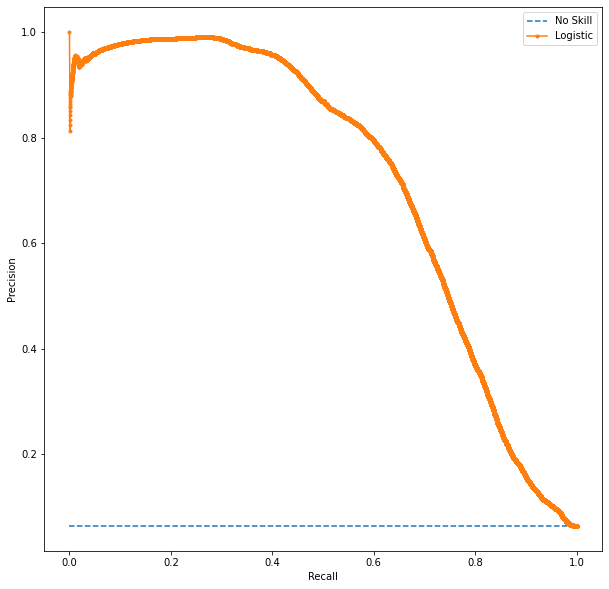

In [173]:
#try PR curve on scaled data first
model = LogisticRegression(random_state = 42, solver ='liblinear', max_iter = 500, C = 100)
model = model.fit(X_train_scaled,y_train)
plt.figure(figsize=(10,10))
lr_probs = model.predict_proba(X_test_scaled)
lr_probs = lr_probs[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

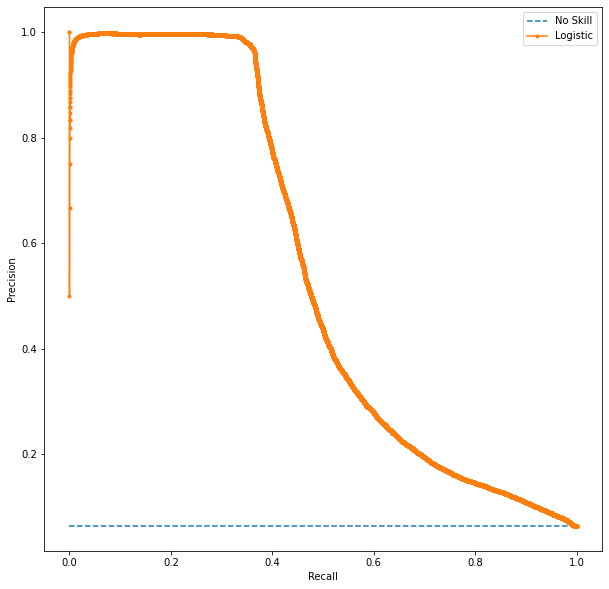

In [174]:
# then on nonscale data
model = LogisticRegression(random_state = 42, solver ='liblinear', max_iter = 500, C = 100)
model = model.fit(X_train,y_train)
plt.figure(figsize=(10,10))
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [207]:
#3 XG boost model

# scaled X first, then non-scaled X.




#!pip install xgboost

In [182]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [68]:

y_pred_test = xgb.predict(X_test_scaled)
y_pred_train = xgb.predict(X_train_scaled)
print('F1 score test =' + f'{f1_score(y_pred_test,y_test):.2f}')
print('Accuracy score train = '+ f'{accuracy_score(y_train,y_pred_train):.2f}')
print('roc score train = '+ f'{roc_auc_score(y_train,y_pred_train):.2f}')

f1=f1_score(y_pred_test,y_test)
ac = accuracy_score(y_train,y_pred_train)
roc = roc_auc_score(y_train,y_pred_train)

F1 score test =0.90
Accuracy score train = 0.99
roc score train = 0.95


In [76]:
df3 = {'Model': 'XGBoost',
       'Accuracy': [ac],
       'F1' : [f1],
       'ROC': [roc]}

df3 = pd.DataFrame(df3)
scores = pd.concat([scores, df3])
scores = scores.drop(columns = 'index', index = 2)
scores = scores.reset_index()

,index,Model,Accuracy,F1,ROC
0,0.0,Random Forest,0.986893,0.986729,0.933282
1,0.0,Logistic Regression,0.963782,0.654503,0.906778
2,0.0,Logistic Regression,0.990893,0.897610,0.953058
0,NaN,XGBoost,0.990893,0.897610,0.953058


In [126]:
scores

,Model,Accuracy,F1,ROC
0,Random Forest,0.986893,0.986729,0.933282
1,Logistic Regression,0.963782,0.654503,0.906778
2,XGBoost,0.988914,0.896893,0.942874


In [231]:
grid_params = {
    'max_depth':range(3,10,2),
    'min_child_weight': range(1,6,2)
}

In [243]:
grid_search = GridSearchCV(estimator = xgb, param_grid = grid_params, cv = 5, scoring = 'f1')
grid_search.fit(X_train_scaled,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, mono

In [245]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 5, 'min_child_weight': 1}, 0.8980537165136869)

In [184]:
cm

array([[168844,    936],
       [  1417,  10234]], dtype=int64)

In [185]:
xgb = XGBClassifier(random_state = 42, max_depth = 5, min_child_weight = 1)
xgb.fit(X_train_scaled, y_train)
y_pred_test = xgb.predict(X_test_scaled)
y_pred_train = xgb.predict(X_train_scaled)
print('F1 score test =' + f'{f1_score(y_pred_test,y_test):.2f}')
print('Accuracy score train = '+ f'{accuracy_score(y_train,y_pred_train):.2f}')
print('roc score train = '+ f'{roc_auc_score(y_train,y_pred_train):.2f}')

f1=f1_score(y_pred_test,y_test)
ac = accuracy_score(y_train,y_pred_train)
roc = roc_auc_score(y_train,y_pred_train)

F1 score test =0.90
Accuracy score train = 0.99
roc score train = 0.94


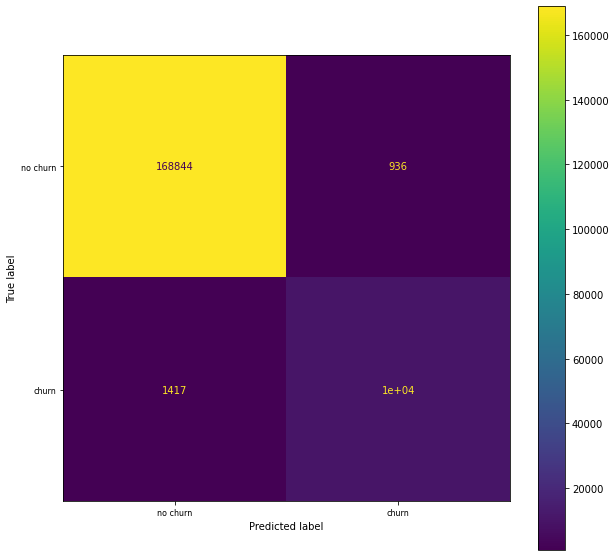

In [186]:
cm = confusion_matrix(y_test, y_pred_test, labels = xgb.classes_)
fig, ax = plt.subplots(figsize =(10,10))
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no churn', 'churn'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no churn', 'churn'], fontsize = 8)
ax.set_yticklabels(labels = ['no churn', 'churn'], fontsize = 8)
display_cm.plot(ax = ax)

In [187]:
cm

array([[168844,    936],
       [  1417,  10234]], dtype=int64)

In [98]:
df3 = {'Model': 'XGBoost',
       'Accuracy': [ac],
       'F1' : [f1],
       'ROC': [roc]}

df3 = pd.DataFrame(df3)
scores = pd.concat([scores, df3])
scores = scores.reset_index()
scores

,index,Model,Accuracy,F1,ROC
0,0,Random Forest,0.986893,0.986729,0.933282
1,1,Logistic Regression,0.963782,0.654503,0.906778
2,0,XGBoost,0.988914,0.896893,0.942874


In [99]:
scores = scores.drop(columns = 'index')

In [105]:
xgbcv = cross_val_score(XGBClassifier(random_state = 42, max_depth = 5, min_child_weight = 1),
                      X_train_scaled, y_train, cv = StratifiedKFold(), scoring = 'f1')

print(f'Scores for each fold are: {xgbcv}')
print(f'Average score: {"{:.3f}".format(xgbcv.mean())}')


Scores for each fold are: [0.9004019  0.90149562 0.89486445 0.89572624 0.89778037]
Average score: 0.898


In [127]:
xgb_pipe = make_pipeline(
StandardScaler(),
XGBClassifier(random_state = 42, max_depth = 5, min_child_weight = 1))


grid_params = {'standardscaler': [StandardScaler(),None]}

xgb_grid_cv = GridSearchCV(xgb_pipe, param_grid = grid_params, cv = 5, n_jobs = -1)
model = xgb_grid_cv.fit(X_train,y_train)
model.best_params_

# no need to try non scale data.

{'standardscaler': StandardScaler()}

In [ ]:

#try PR curve on scaled data first

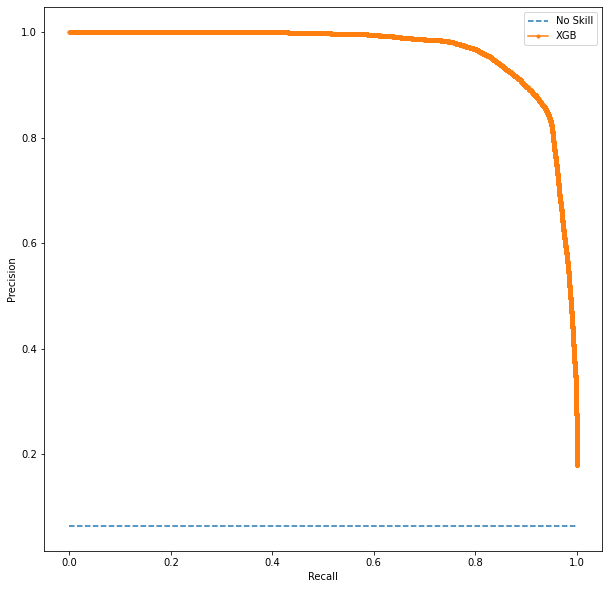

In [175]:
plt.figure(figsize=(10,10))
model = XGBClassifier(random_state = 42, max_depth = 5, min_child_weight = 1)
model = model.fit(X_train_scaled,y_train)

xgb_probs = model.predict_proba(X_test_scaled)
xgb_probs = xgb_probs[:,1]
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(xgb_recall, xgb_precision, marker='.', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

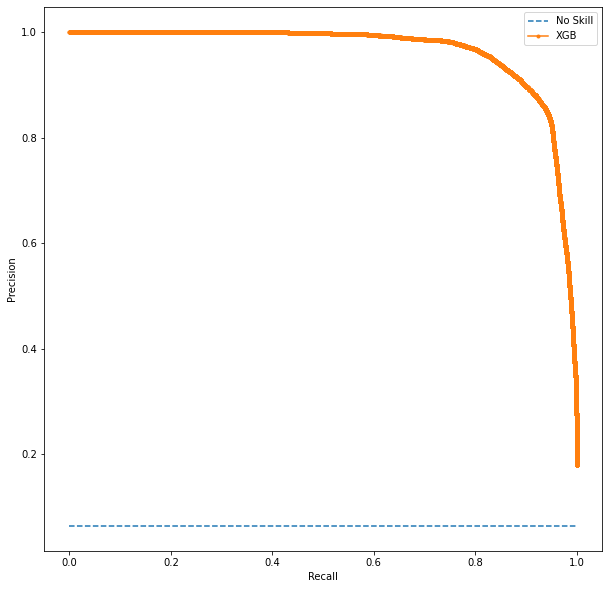

In [176]:
# then on nonscaled
plt.figure(figsize=(10,10))
model = XGBClassifier(random_state = 42, max_depth = 5, min_child_weight = 1)
model = model.fit(X_train,y_train)

xgb_probs = model.predict_proba(X_test)
xgb_probs = xgb_probs[:,1]
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(xgb_recall, xgb_precision, marker='.', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [ ]:
# try to tune hyperparameters with Bayesian optimization

In [202]:
def bo_params_xgb(max_depth, gamma,learning_rate,n_estimators,subsample):
    
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'learning_rate':learning_rate,
        'subsample': subsample,
        'eval_metric': 'aucpr',
        'n_estimators':int(n_estimators)
    }
    
    scores = cross_val_score(XGBClassifier(random_state=42, **params,use_label_encoder=False),
                             X_train_scaled, y_train,cv=5,scoring="f1").mean()
    return scores.mean()

In [203]:
from bayes_opt import BayesianOptimization

In [204]:
xgb_bo = BayesianOptimization(bo_params_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                              'subsample':(0.5,1),
                                              'n_estimators':(100,200)
                                             })

In [206]:
results = xgb_bo.maximize(n_iter=10, init_points=2)

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 10        | 0.8845    | 0.9862    | 0.749     | 7.203     | 172.5     | 0.8125    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 11        | 0.8342    | 0.1957    | 0.05582   | 3.463     | 144.7     | 0.6271    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 12        | 0.8747    | 0.275     | 0.7105    | 8.267     | 136.1     | 0.5508    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 13        | 0.8836    | 0.2488    | 0.8287    | 7.946     | 111.3     | 0.8649    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 14        | 0.8919    | 0.8054    | 0.4251    | 3.482     | 157.1     | 0.9867    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 15        | 0.7788    | 0.5307    | 0.9579    | 3.895     | 172.3     | 0.5402    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 16        | 0.8779    | 0.7877    | 0.671     | 7.851     | 195.2     | 0.5744    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 17        | 0.8954    | 0.9818    | 0.06806   | 6.592     | 154.8     | 0.5673    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 18        | 0.8918    | 0.8904    | 0.4752    | 9.779     | 159.5     | 0.9503    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 19        | 0.8956    | 0.5968    | 0.2988    | 4.301     | 193.5     | 0.7587    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 20        | 0.8753    | 0.5523    | 0.6687    | 7.592     | 125.0     | 0.5179    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 21        | 0.8887    | 0.4331    | 0.4291    | 3.052     | 112.1     | 0.8346    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 22        | 0.8996    | 0.9207    | 0.1063    | 8.297     | 153.6     | 0.9951    |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.p

| 23        | 0.8855    | 0.6091    | 1.0       | 5.731     | 141.4     | 1.0       |


C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\marsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


KeyboardInterrupt: 